In [1]:
### Packages 


library(tidyverse)
library(moderndive)
library(geometry)
library(factoextra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [4]:
### Q1. X and Y should not be correlated, they are independent
set.seed(44)
x = rnorm(25, 5, 2)
y = rnorm(25, 1, 2)
head(x)
head(y)

[1] 6.307837 5.038105 1.300992 4.734473 2.602364 2.340517

[1] -3.51640781 -0.04749585  3.37605627  4.03124049  1.36672728  0.86289061

In [5]:
### Q2. W and X should have a mild correlation ( < 0.5)
w = 0.4 * x + rnorm(25, 0, 2)

In [6]:
### Q3. Y and Z should have a mild correlation ( > 0.9)
z = 1.1 * y + rnorm(25, 0, 0.2)

In [7]:
### Q4. Generate a variable outcome as a linear combination of W, X, Y, and Z
df_wxyz = data.frame(x, y, z, w)
head(df_wxyz)

,x,y,z,w
,<dbl>,<dbl>,<dbl>,<dbl>
1,6.307837,-3.51640781,-3.9987502,-2.745609
2,5.038105,-0.04749585,-0.1454666,2.601466
3,1.300992,3.37605627,3.6118633,-3.942406
4,4.734473,4.03124049,4.0925373,-0.962564
5,2.602364,1.36672728,1.7153556,4.126834
6,2.340517,0.86289061,0.9970132,3.217922



Call:
lm(formula = y ~ z, data = df_wxyz)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32071 -0.12218  0.00482  0.09223  0.53892 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03940    0.04535   0.869    0.394    
z            0.91131    0.01649  55.261   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1909 on 23 degrees of freedom
Multiple R-squared:  0.9925,	Adjusted R-squared:  0.9922 
F-statistic:  3054 on 1 and 23 DF,  p-value: < 2.2e-16



Call:
lm(formula = x ~ w, data = df_wxyz)

Residuals:
   Min     1Q Median     3Q    Max 
-2.945 -1.429 -0.078  1.087  5.721 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.3499     0.4541   9.580 1.71e-09 ***
w             0.2900     0.1531   1.894   0.0709 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.081 on 23 degrees of freedom
Multiple R-squared:  0.1349,	Adjusted R-squared:  0.09732 
F-statistic: 3.587 on 1 and 23 DF,  p-value: 0.07086



Call:
lm(formula = x ~ y, data = df_wxyz)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7566 -1.3387 -0.3098  0.8549  6.0829 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.4389     0.5265   8.430 1.73e-08 ***
y             0.1833     0.2078   0.882    0.387    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.2 on 23 degrees of freedom
Multiple R-squared:  0.03273,	Adjusted R-squared:  -0.00933 
F-statistic: 0.7781 on 1 and 23 DF,  p-value: 0.3868


Warning message:
“`geom_parallel_slopes()` didn't recieve a grouping variable with more than one unique value. Make sure you supply one. Basic model is fitted.”
Warning message:
“`geom_parallel_slopes()` didn't recieve a grouping variable with more than one unique value. Make sure you supply one. Basic model is fitted.”


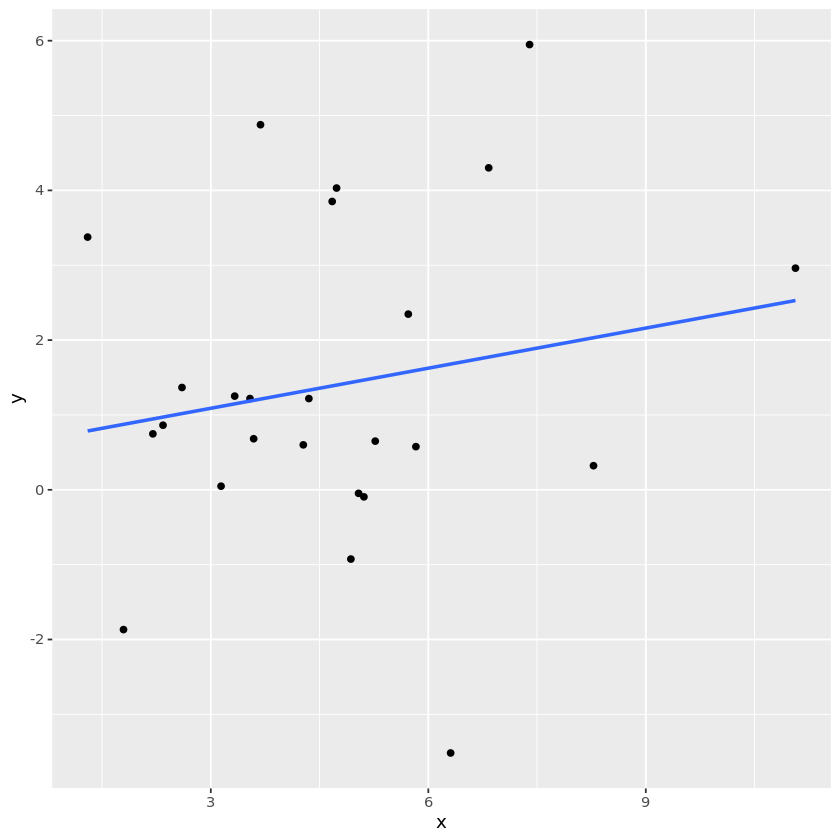

Warning message:
“`geom_parallel_slopes()` didn't recieve a grouping variable with more than one unique value. Make sure you supply one. Basic model is fitted.”


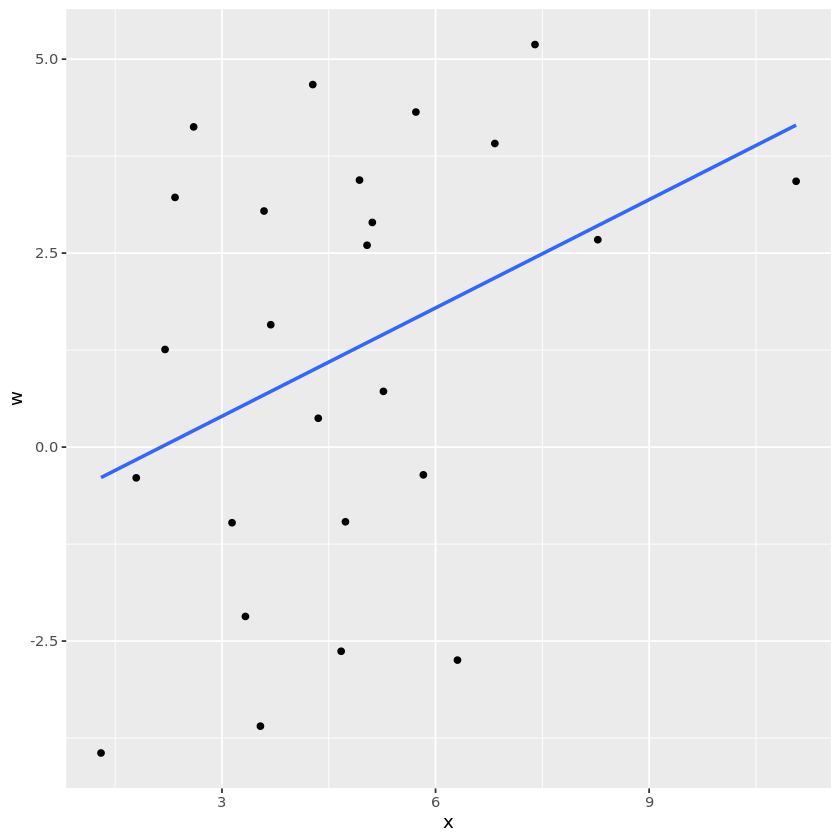

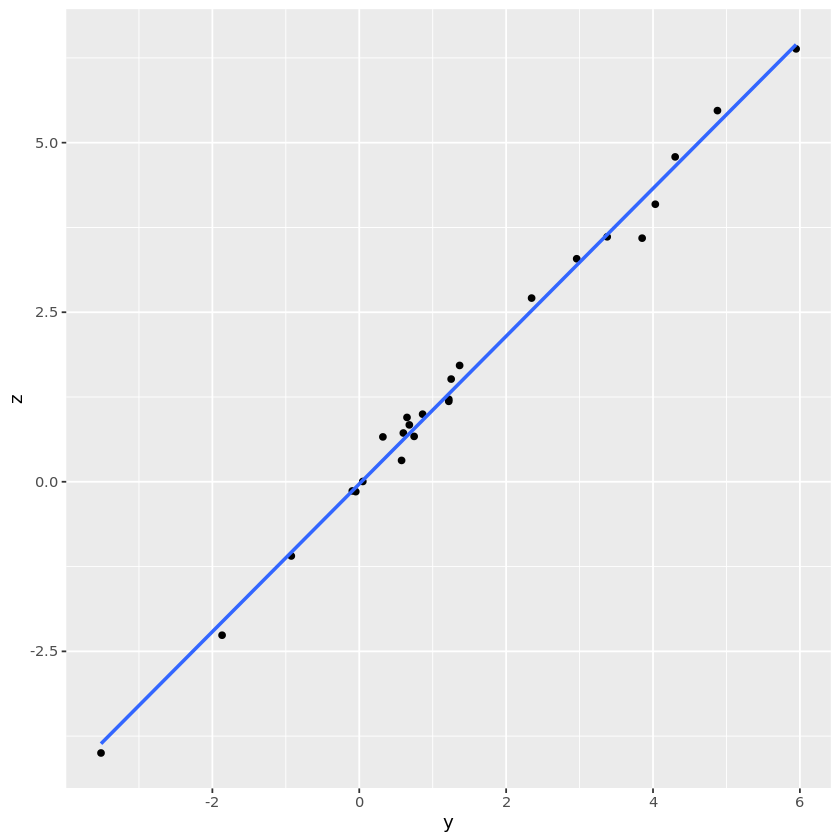

In [8]:
### Q5. Model your outcome using W, X, Y, and Z. Do your results match your model params?
lm_xy = lm(x~y, df_wxyz)
lm_yz = lm(y~z, df_wxyz)
lm_xw = lm(x~w, df_wxyz)
summary(lm_yz)
summary(lm_xw)
summary(lm_xy)

ggplot(df_wxyz, aes(x, y)) + 
  geom_point() + 
  geom_parallel_slopes(se=FALSE)
ggplot(df_wxyz, aes(x, w)) + 
  geom_point() + 
  geom_parallel_slopes(se=FALSE)
ggplot(df_wxyz, aes(y, z)) + 
  geom_point() + 
  geom_parallel_slopes(se=FALSE)

### x/y and x/w are very minimally correlated, I would have expected a higher correlation. but y/z correlate more than I would expect for the correlation value I gave it.... 

In [9]:
### Q6. Use PCA to reduce the dimensionality of your dataset. can you explain why you don't need to include the outcome?
pca_wxyz = prcomp(df_wxyz, scale=TRUE)
str(pca_wxyz)
pca_wxyz$sdev^2 / sum(pca_wxyz$sdev^2)

### the data doesn't seem to be following the parameters (based on above explanation as well), not sure if I messed something up or if it's because it's a randomly generated data set? 

List of 5
 $ sdev    : num [1:4] 1.471 1.096 0.796 0.053
 $ rotation: num [1:4, 1:4] -0.298 -0.639 -0.647 -0.291 0.638 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "x" "y" "z" "w"
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 $ center  : Named num [1:4] 4.69 1.39 1.48 1.19
  ..- attr(*, "names")= chr [1:4] "x" "y" "z" "w"
 $ scale   : Named num [1:4] 2.19 2.16 2.36 2.77
  ..- attr(*, "names")= chr [1:4] "x" "y" "z" "w"
 $ x       : num [1:25, 1:4] 3.1439 0.676 -0.1697 -1.2746 -0.0798 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 - attr(*, "class")= chr "prcomp"


[1] 0.5407858094 0.3002655437 0.1582467913 0.0007018556

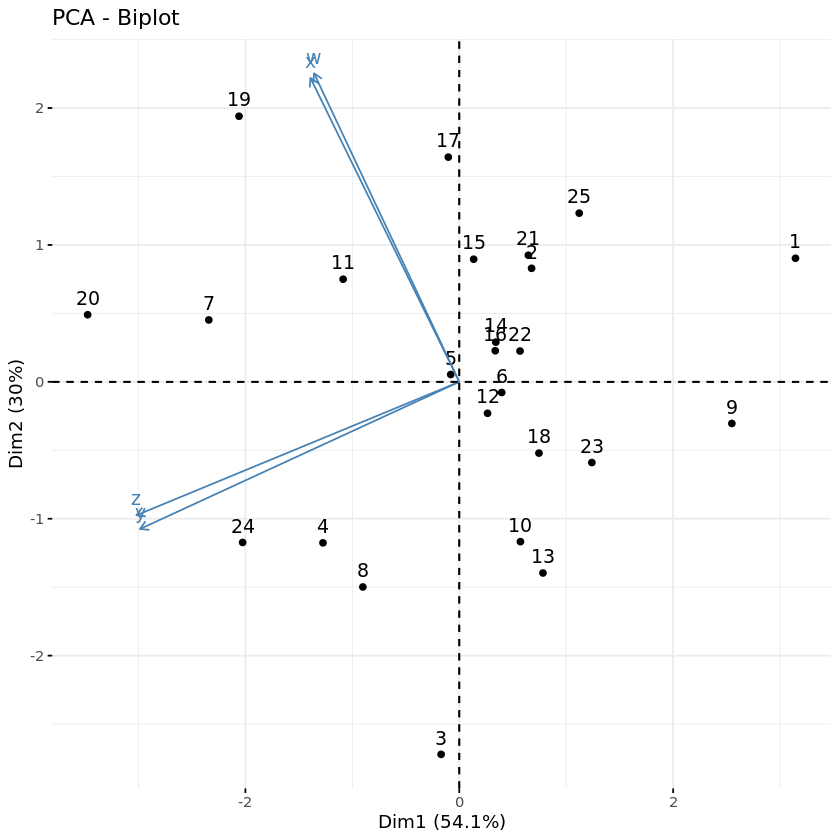

In [10]:
### Q7. Use the bi-plot to visualize the contributions of your initial variables
fviz_pca_biplot(pca_wxyz)

In [ ]:
### Q8.How efficient is the new lower-dimensional space representation at predicting the outcome?

### seems to be significantly less efficient - there are many points that are compeltely unaccounted for in this model? Once again not sure if it's because it's a random dataset but I believe it should work.   